## Setup

In [2]:
def mount_drive():
    from google.colab import drive
    drive.mount('/content/drive/')


mount_drive()

Mounted at /content/drive/


In [3]:
!nvidia-smi


Tue Jul  1 13:52:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
%%capture
!pip install timm flash_attn einops;

In [5]:
%%bash
git clone https://github.com/AssemblyAI-Community/florence-2
mv florence-2/** .
rm -rf ./florence-2/

Cloning into 'florence-2'...


In [6]:
import copy

from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import requests

import utils

%matplotlib inline

In [3]:
!pip install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install -U flash-attn --no-build-isolation
!pip install -U transformers accelerate

# Now try loading the model again
from transformers import AutoModelForCausalLM, AutoProcessor

model_id = 'microsoft/Florence-2-large'
try:
    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        trust_remote_code=True,
        torch_dtype="auto"
    ).eval().cuda()
    processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error: {e}")

Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 62.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.52.4
    Uninstalling transformers-4.52.4:
      Successfully uninstalled transformers-4.52.4


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

configuration_florence2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


pytorch_model.bin:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Model loaded successfully!


In [4]:
model_id = 'microsoft/Florence-2-large'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True).eval().cuda()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

In [5]:
import utils

utils.set_model_info(model, processor)

import copy

%matplotlib inline

In [6]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import requests

In [8]:


path = "/content/drive/MyDrive/Ramco/1_nowrap_images/image1.jpeg"
image = Image.open(path)
image_rgb = Image.open(path).convert("RGB")

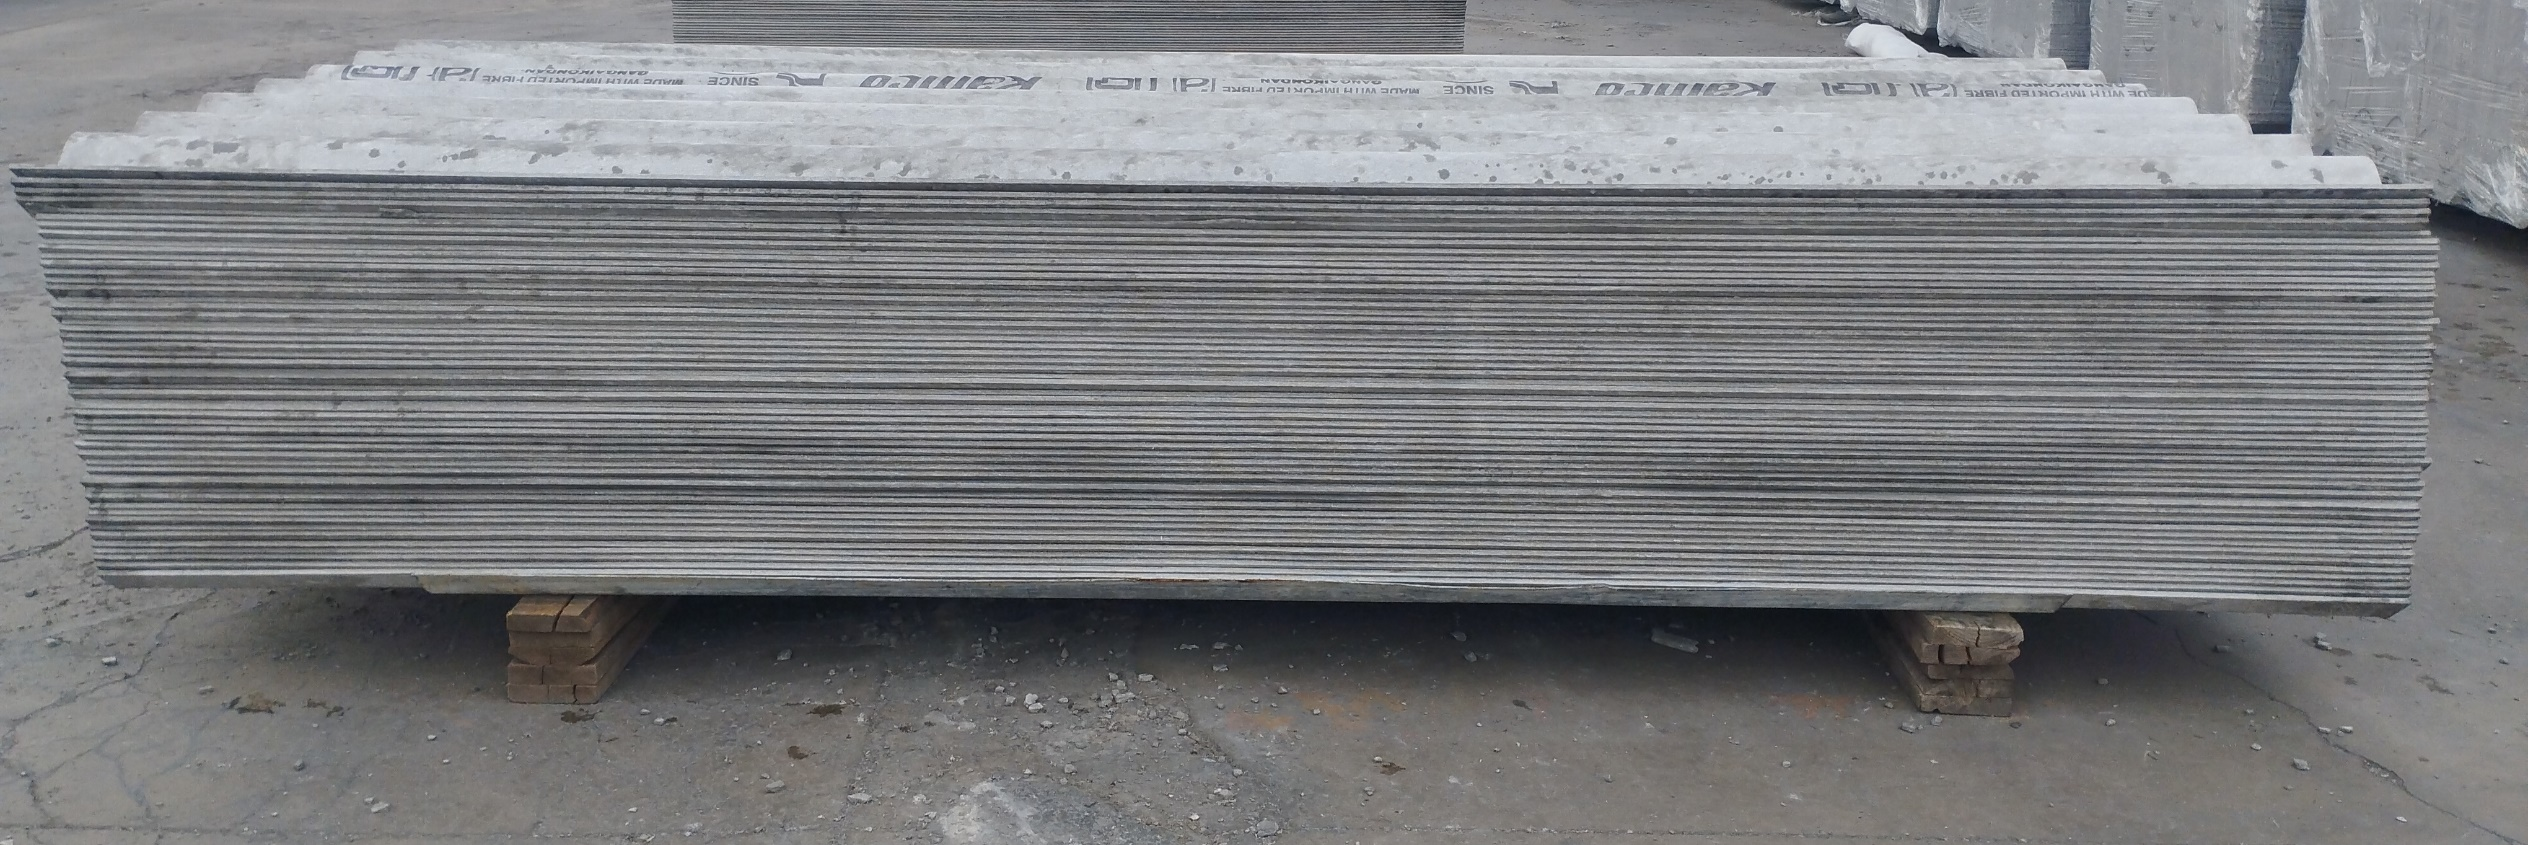

In [9]:
image

In [10]:
tasks = [utils.TaskType.CAPTION,
         utils.TaskType.DETAILED_CAPTION,
         utils.TaskType.MORE_DETAILED_CAPTION,]


In [11]:

for task in tasks:
  results = utils.run_example(task, image_rgb)
  print(f'{task.value}{results[task]}')

<CAPTION>A stack of white granite slabs sitting on top of a wooden pallet.
<DETAILED_CAPTION>The image shows a pile of grey granite slabs sitting on top of a wooden pallet. The slabs are arranged in a neat stack, with some of them overlapping each other. The grey granite has a glossy finish, and the wooden pallets provide a sturdy base for the slabs.
<MORE_DETAILED_CAPTION>The image shows a stack of white marble slabs on a wooden pallet in a warehouse. The slabs are stacked on top of each other and appear to be new and unused. They are rectangular in shape and have a textured surface with vertical lines running horizontally across them. The pallet is made of concrete and is placed on a concrete floor. In the background, there are other pallets and stacks of marble blocks. The sky is overcast and the overall mood of the image is industrial and warehouse-like.


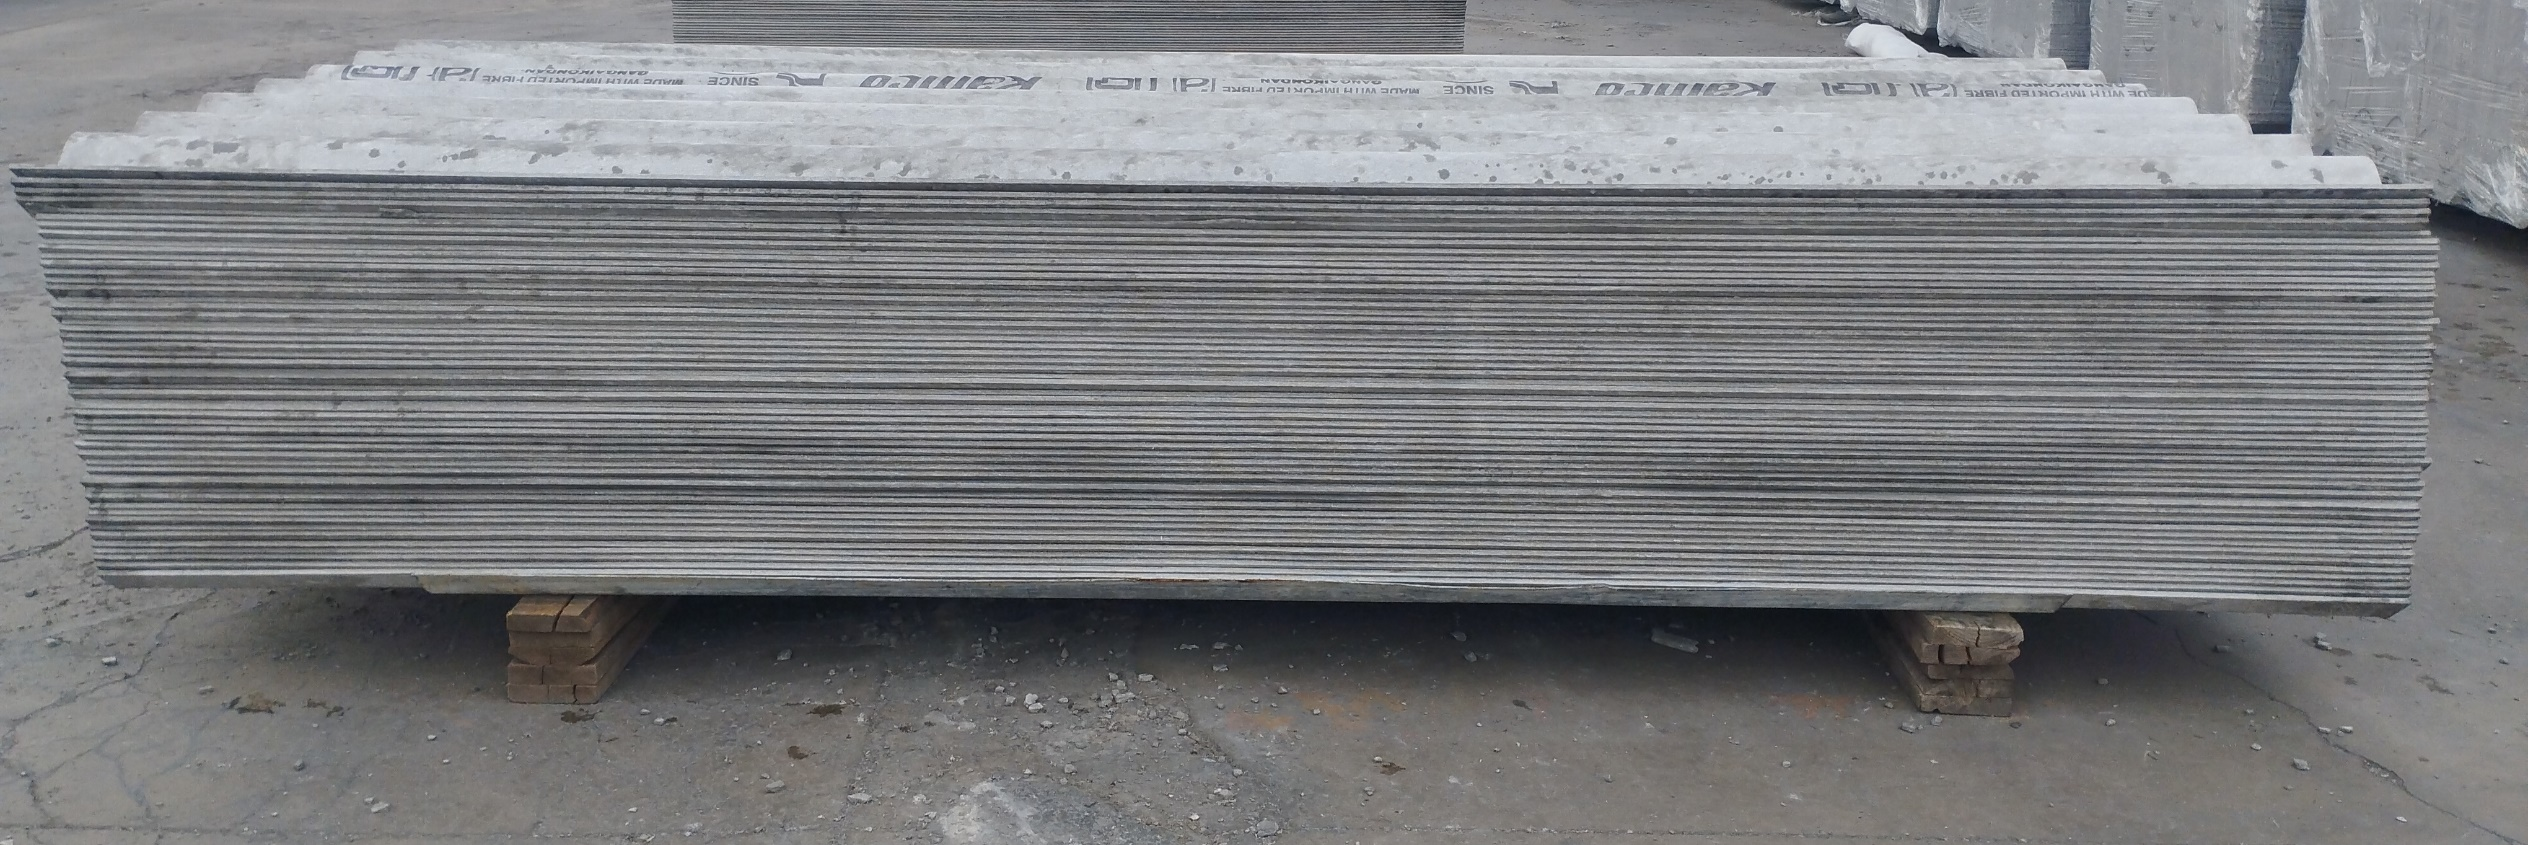

In [ ]:
task = utils.TaskType.OCR_WITH_REGION
results = utils.run_example(task, image_rgb)

# Boxes drawn directly to image, so copy to avoid adulterating image for later tasks
image_copy = copy.deepcopy(image)
utils.draw_ocr_bboxes(image_copy, results[task])

<REGION_PROPOSAL>


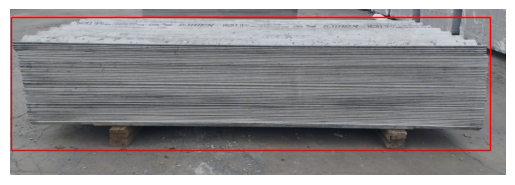

<OD>


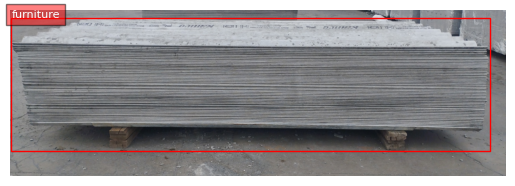

<DENSE_REGION_CAPTION>


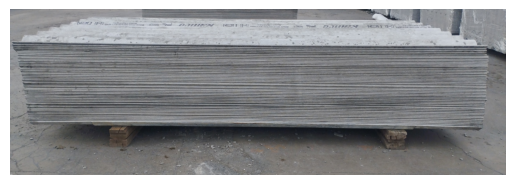

In [12]:
tasks = [utils.TaskType.REGION_PROPOSAL,
         utils.TaskType.OBJECT_DETECTION,
         utils.TaskType.DENSE_REGION_CAPTION,]

for task in tasks:
  results = utils.run_example(task, image_rgb)
  print(task.value)
  utils.plot_bbox(results[task], image)

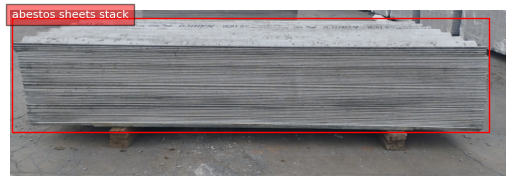

In [13]:
task_prompt = utils.TaskType.PHRASE_GROUNDING
results = utils.run_example(task_prompt, image_rgb, text_input="abestos sheets stack")
utils.plot_bbox(results[utils.TaskType.PHRASE_GROUNDING], image)

{'bboxes': [[8.848000526428223, 37.602500915527344, 2445.840087890625, 619.8074951171875]], 'labels': ['grey abestos sheets stack']}


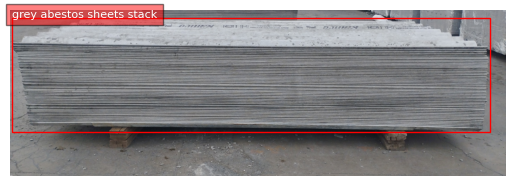

In [14]:
task_prompt = utils.TaskType.OPEN_VOCAB_DETECTION
results = utils.run_example(task_prompt, image_rgb, text_input="grey abestos sheets stack")
bbox_results  = utils.convert_to_od_format(results[utils.TaskType.OPEN_VOCAB_DETECTION])
print(bbox_results)
utils.plot_bbox(bbox_results, image)

In [15]:
import os
import cv2
import numpy as np
from PIL import Image
from transformers import AutoModelForCausalLM, AutoProcessor

input_folder = "/content/drive/MyDrive/Ramco/1_nowrap_images"
output_folder ="/content/drive/MyDrive/Ramco/2_nowrap_images_bound"
os.makedirs(output_folder, exist_ok=True)

for img_name in os.listdir(input_folder):
    if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue

    img_path = os.path.join(input_folder, img_name)
    image = Image.open(img_path)
    image_rgb = Image.open(img_path).convert("RGB")

    task_prompt = utils.TaskType.OPEN_VOCAB_DETECTION
    results = utils.run_example(task_prompt, image_rgb, text_input="grey abestos sheets stack")
    bbox_results  = utils.convert_to_od_format(results[utils.TaskType.OPEN_VOCAB_DETECTION])
    bbox_results  =  bbox_results['bboxes'][0]

    print(bbox_results)
    # for i, bbox in enumerate(bboxes):
    x1, y1, x2, y2 = bbox_results
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

    img = image.copy()
    img = np.array(img)  # Convert PIL Image to NumPy array

    crop = img[y1:y2, x1:x2]
    #     cv2.imwrite(f"{output_folder}/{base_name}_crop_{i}.jpg", crop)

    # # Draw boxes on original (optional)
    # for bbox in bboxes:
    #     x1, y1, x2, y2 = map(int, bbox)
    #     cv2.rectangle(image_cv, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.imwrite(f"{output_folder}/{img_name}", crop)

print("Processing complete!")

[29.07200050354004, 23.375, 2498.92822265625, 641.3250122070312]
[84.75499725341797, 51.5984992980957, 2455.364990234375, 499.6244812011719]
[8.848000526428223, 37.602500915527344, 2445.840087890625, 619.8074951171875]
[51.50250244140625, 58.67550277709961, 2850.295654296875, 612.33154296875]
[99.85600280761719, 115.76250457763672, 2425.6162109375, 553.822509765625]
[82.16000366210938, 35.35350036621094, 2471.1201171875, 499.99951171875]
[44.2400016784668, 32.25749969482422, 2506.51220703125, 700.7825317382812]
[16.4320011138916, 27.616498947143555, 2503.984130859375, 696.2265014648438]
[16.4320011138916, 51.03900146484375, 2435.72802734375, 626.301025390625]
[61.936004638671875, 56.342498779296875, 2471.1201171875, 464.91650390625]
[440.4119873046875, 69.4949951171875, 2300.843994140625, 605.114990234375]
Processing complete!


In [19]:
import cv2
import numpy as np
import os
from glob import glob


# ── Load the image ─────────────────────────────
input_dir = "/content/drive/MyDrive/Ramco/2_nowrap_images_bound"    # Replace with your input folder
output_dir = "/content/drive/MyDrive/Ramco/3_nowrap_images_bound_sharpened"

# Create output directories if not exist
os.makedirs(output_dir, exist_ok=True)
# os.makedirs(preview_dir, exist_ok=True)

# Process all image files
image_paths = glob(os.path.join(input_dir, '*.*'))

# ── Sharpening kernel ──────────────────────────
# You can tweak the kernel values to adjust strength
kernel = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])


for idx, path in enumerate(image_paths):
    try:
        # Read and grayscale
        img = cv2.imread(path)
        # ── Apply sharpening ───────────────────────────
        sharpened = cv2.filter2D(img, -1, kernel)


        # Save final binary image
        filename = os.path.basename(path)
        out_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.png")
        cv2.imwrite(out_path, sharpened)

        print(f"sharpened: {filename}")

    except Exception as e:
        print(f"Error processing {path}: {e}")




sharpened: image2.jpeg
sharpened: image6.jpeg
sharpened: image1.jpeg
sharpened: image3.jpeg
sharpened: image5.jpeg
sharpened: image9.jpeg
sharpened: image7.jpeg
sharpened: image8.jpeg
sharpened: image10.jpeg
sharpened: image4.jpeg


In [20]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
visualize_results = 0

class SheetStackCounter:
    def __init__(self):
        self.debug_mode = True

    def preprocess_image(self, img_path):
        """
        Preprocess the image to enhance edge detection for stacked sheets
        """
        # Read image
        img = cv2.imread(img_path)
        if img is None:
            raise ValueError(f"Could not load image from {img_path}")

        original = img.copy()

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply multiple Gaussian blur iterations to reduce noise
        for _ in range(3):
            gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # Enhance contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        gray = clahe.apply(gray)

        # Apply morphological operations to enhance horizontal lines
        # Create horizontal kernel
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))

        # Morphological opening to enhance horizontal lines
        gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)

        return original, gray

    def detect_edges(self, gray):
        """
        Detect edges and enhance horizontal features
        """
        # Canny edge detection with adjusted parameters
        edges_processed = cv2.Canny(gray, 50, 150, apertureSize=3, L2gradient=True)
        # 2. Compute vertical Sobel gradient (Y-direction)
        sob_y = cv2.Sobel(gray, cv2.CV_64F, dx=0, dy=1, ksize=3)


        # 3. Keep only NEGATIVE gradients (light → dark from top to bottom)
        light_to_dark = np.where(sob_y < 0, -sob_y, 0)  # make negative values positive, set rest to 0

        # 4. Normalize to 0–255 for visualization
        norm_y = np.uint8((light_to_dark / (light_to_dark.max() + 1e-6)) * 255)

        # Keep only strong white gradients above a threshold
        threshold_value = 100  # Adjust this based on how strong the lines are
        _, edges_processed = cv2.threshold(norm_y, threshold_value, 255, cv2.THRESH_BINARY)

            # Step 6: Flip the edge image horizontally
        flipped_edges = cv2.flip(edges_processed, 1)  # flipCode=1 means horizontal flip

        # Step 7: Superimpose (bitwise OR)
        edges_processed = cv2.bitwise_or(edges_processed, flipped_edges)

        edges_processed = cv2.Canny(edges_processed, 50, 150, apertureSize=3, L2gradient=True)



        # h, w = edges_processed.shape[:2]
        # edges_processed = edges_processed[:, :w // 2]




        # Create horizontal kernel for morphological operations
        # horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
        # edges_processed = cv2.morphologyEx(edges_processed, cv2.MORPH_CLOSE, horizontal_kernel)

        return edges_processed

    def analyze_edge_density(self, edges, window_size=10):
        """
        Analyze horizontal edge density across the image height
        """
        height, width = edges.shape
        edge_density = []

        # Calculate edge density for each row using a sliding window
        for y in range(height):
            window_start = max(0, y - window_size // 2)
            window_end = min(height, y + window_size // 2 + 1)

            window_edges = edges[window_start:window_end, :]
            density = np.sum(window_edges) / (window_edges.shape[0] * window_edges.shape[1])
            edge_density.append(density)

        return np.array(edge_density)

    def find_peaks_in_density(self, edge_density, min_prominence=0.4, min_distance=5.0):
        """
        Find peaks in edge density that correspond to sheet edges
        """
        # Find peaks in the edge density
        peaks, properties = find_peaks(
            edge_density,
            prominence=min_prominence,
            distance=min_distance,
            height=int(((np.max(edge_density) + np.min(edge_density))/2)*5/6), # Only consider peaks above average density
            # width = 0.65,
            # rel_height = 0.02,
            # threshold = 0.03
        )
        # print(properties)

        return peaks

    def count_sheets(self, img_path):
        """
        Main function to count sheets using density peaks method
        """
        try:
            # Preprocess image
            original, gray = self.preprocess_image(img_path)

            # Detect edges
            edges = self.detect_edges(gray)

            # Analyze edge density
            edge_density = self.analyze_edge_density(edges, window_size=10)

            # Find density peaks
            density_peaks = self.find_peaks_in_density(edge_density)

            if self.debug_mode:
                if(visualize_results):
                    self.visualize_results(original, edges, edge_density, density_peaks)

            # Print results
            # print(f"=== SHEET COUNTING RESULTS ===")
            # print(f"Density peaks method: {len(density_peaks)} sheets detected")

            return len(density_peaks), original

        except Exception as e:
            print(f"Error processing image: {str(e)}")
            return 0, None

    def visualize_results(self, original, edges, edge_density, density_peaks):
        """
        Visualize the density peaks analysis results
        """
        # Create result image with detected sheet lines
        result_img = original.copy()

        # Draw detected sheet lines in green
        for y_pos in density_peaks:
            cv2.line(result_img, (0, int(y_pos)), (result_img.shape[1], int(y_pos)), (0, 255, 0), 3)

        # Create visualization
        plt.figure(figsize=(20, 10))

        # Original image
        plt.subplot(2, 3, 1)
        plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        # Processed edges
        plt.subplot(2, 3, 2)
        plt.imshow(edges, cmap='gray')
        plt.title('Processed Edges')
        plt.axis('off')

        # Result with detected sheets
        plt.subplot(2, 3, 3)
        plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
        plt.title(f'Detected Sheets: {len(density_peaks)}')
        plt.axis('off')

        # Edge density profile
        plt.subplot(2, 3, 4)
        plt.plot(edge_density, range(len(edge_density)))
        plt.gca().invert_yaxis()
        plt.xlabel('Edge Density')
        plt.ylabel('Y Position (pixels)')
        plt.title('Edge Density Profile')
        plt.grid(True, alpha=0.3)

        # Edge density with peaks marked
        plt.subplot(2, 3, 5)
        plt.plot(edge_density, range(len(edge_density)), 'b-', alpha=0.7, label='Edge Density')
        for peak in density_peaks:
            plt.axhline(y=peak, color='red', linestyle='--', alpha=0.7)
        plt.gca().invert_yaxis()
        plt.xlabel('Edge Density')
        plt.ylabel('Y Position (pixels)')
        plt.title('Detected Peaks (Red Lines)')
        plt.grid(True, alpha=0.3)
        plt.legend()

        # Peak positions bar chart
        plt.subplot(2, 3, 6)
        plt.bar(['Detected Sheets'], [len(density_peaks)], color='green', alpha=0.7)
        plt.ylabel('Sheet Count')
        plt.title('Final Count')
        plt.grid(True, alpha=0.3, axis='y')

        # Add count label on bar
        plt.text(0, len(density_peaks) + 0.1, str(len(density_peaks)),
                ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.show()

def main():
    counter = SheetStackCounter()

    # Folder containing images
    # folder_path = "data/Ramco_edits/1 nowrap_images_bound"
    folder_path ="/content/drive/MyDrive/Ramco/3_nowrap_images_bound_sharpened"


    # Supported image formats
    valid_exts = {".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff"}
    image_files = [f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in valid_exts]
    sorted(image_files)

    for fname in sorted(image_files):
        image_path = os.path.join(folder_path, fname)
        # print(f"\nProcessing {fname}...")

        try:
            sheet_count, processed_image = counter.count_sheets(image_path)
            print(f"{fname}... → {sheet_count} sheets detected in {fname}")

        except Exception as e:
            print(f"✖ Error processing {fname}: {e}")

    print("\n✅ Batch processing complete!")

if __name__ == "__main__":
    main()


# python scripts/5_unified/new.py

# up - 3,5,7,10

image1.png... → 56 sheets detected in image1.png
image10.png... → 37 sheets detected in image10.png
image2.png... → 52 sheets detected in image2.png
image3.png... → 25 sheets detected in image3.png
image4.png... → 25 sheets detected in image4.png
image5.png... → 21 sheets detected in image5.png
image6.png... → 21 sheets detected in image6.png
image7.png... → 45 sheets detected in image7.png
image8.png... → 49 sheets detected in image8.png
image9.png... → 39 sheets detected in image9.png

✅ Batch processing complete!
